In [1]:
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import seaborn as sns
import itertools

from multisoc.infer import data_loader

from inequality_analysis_AddHealth import *

## Load inferred preferences (computed in https://github.com/CSHVienna/multidimensional_social_interactions_paper)

In [2]:
dimensions_list = ['grade','race','sex']
num_dimensions = len(dimensions_list)
sex_list = ["Female","Male"]
race_list = ["White","Black","Hispanic","Asian","Mixed/other"]
grade_list = ["7th","8th","9th","10th","11th","12th"]
all_attributes_dict = {
    "grade":grade_list,
    "race":race_list,
    "sex":sex_list
}

multidim_groups = list(itertools.product(*[all_attributes_dict[d] for d in dimensions_list]))

results_df = pd.read_csv("preference_results_v4_merged.csv")

## Compute empirical degree inequalities and predicted by the model

In [4]:
bad_comms = [48, 1]

ineq_emp_lst = {d:{k:[] for k in v} for d,v in all_attributes_dict.items()}
ineq_anal_lst = {d:{k:[] for k in v} for d,v in all_attributes_dict.items()}
ineq_emp_multi_lst = {group:[] for group in multidim_groups}

## Load edges lists filtered by the same method used to compute H
for school in range(1,85):
    if school in bad_comms:
        continue
    nodes_list,edges_list = data_loader.load_AddHealth(school, 
                                                       th_sex = 20, 
                                                       th_race= 20, 
                                                       th_grade= 20, 
                                                       school= None, 
                                                       remove_unreported=True
                                                      )
    if len(nodes_list['sex'].cat.categories)==1 or len(nodes_list['race'].cat.categories)==1:
        print('There is only one sex category or only one race category: we skip it')
    elif nodes_list.shape[0]<100:
        print('There are less than 100 students in this school: we skip it')
    else:
        assert school in results_df["school"].values
        results_df_row = results_df[results_df["school"]==school]
        
        ## Compute 1D inequalities - empirical
        ineq_emp = all_emp_ineq_from_nodes_edges_df(nodes_list, edges_list, dimensions_list)
            
        ## Compute 1D inequalities - analytical
        ineq_anal = anal_inequalities_1D_from_data(nodes_list,edges_list,results_df_row,all_attributes_dict,dimensions_list,aggr_fun="and_1d-simple")
        
        for d,vals in all_attributes_dict.items():
            for v in vals:
                
                try:
                    ineq_emp_lst[d][v].append(ineq_emp[d][v])
                except KeyError:
                    ineq_emp_lst[d][v].append(np.nan)
                    
                try:
                    ineq_anal_lst[d][v].append(ineq_anal[d][v])
                except KeyError:
                    ineq_anal_lst[d][v].append(np.nan)

        ## Multidimensional 1vRest inequalities
        ## Empirical
        multi_ineq_emp = all_multi_emp_ineq_from_nodes_edges_df(
                nodes_list,
                edges_list,
                multidim_groups,
                dimensions_list)
        for group in multidim_groups:
            ineq_emp_multi_lst[group].append(multi_ineq_emp[group])

C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CS

Community #2: one school
There is only one sex category or only one race category: we skip it
Community #3: one school
There are less than 100 students in this school: we skip it
Community #4: 2 schools
There is only one sex category or only one race category: we skip it
Community #5: one school
There is only one sex category or only one race category: we skip it
Community #6: one school
There is only one sex category or only one race category: we skip it
Community #7: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #8: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #9: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #10: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #11: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #12: 1 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #13: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #14: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #15: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #16: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #17: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #18: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #19: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #20: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #21: one school
There is only one sex category or only one race category: we skip it
Community #22: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #23: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #24: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #25: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #26: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #27: one school
There is only one sex category or only one race category: we skip it
Community #28: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #29: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #30: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #31: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #32: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #33: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #34: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #35: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #36: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #37: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #38: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #39: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #40: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #41: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #42: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #43: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #44: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #45: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #46: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #47: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #49: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #50: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #51: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #52: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #53: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #54: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #55: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #56: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #57: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #58: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #59: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #60: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #61: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #62: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #63: one school
There is only one sex category or only one race category: we skip it
Community #64: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #65: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #66: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #67: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #68: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #69: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CS

Community #70: one school
There are less than 100 students in this school: we skip it
Community #71: one school
There are less than 100 students in this school: we skip it
Community #72: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #73: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #74: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #75: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CS

Community #76: one school
There is only one sex category or only one race category: we skip it
Community #77: one school
There are less than 100 students in this school: we skip it
Community #78: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #79: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #80: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #81: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #82: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #83: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #84: 2 schools


## Plot one-dimensional inequalities
Shapes
------
Grade -> circle

Race -> square

Sex -> triangle

-----------------------

Colors
------
7-> C0 [blue]

8->C1 [orange]

9->C2 [green]

10->C3 [red]

11->C4 [purple]

12->C5 [brown]

-------

White-> C0 [blue]

Black->C1 [orange]

Hispanic->C2 [green]

Asian->C3 [red]

Mixed->C4 [purple]

------

Female-> C0 [blue]

Male->C1 [orange]

In [5]:
all_attributes_dict

{'grade': ['7th', '8th', '9th', '10th', '11th', '12th'],
 'race': ['White', 'Black', 'Hispanic', 'Asian', 'Mixed/other'],
 'sex': ['Female', 'Male']}

LinregressResult(slope=0.6591919260684154, intercept=-0.0006614102401446952, rvalue=0.9611665132670962, pvalue=0.0, stderr=0.00673806465157114, intercept_stderr=0.0011251409442612607) 0.9238410662260271


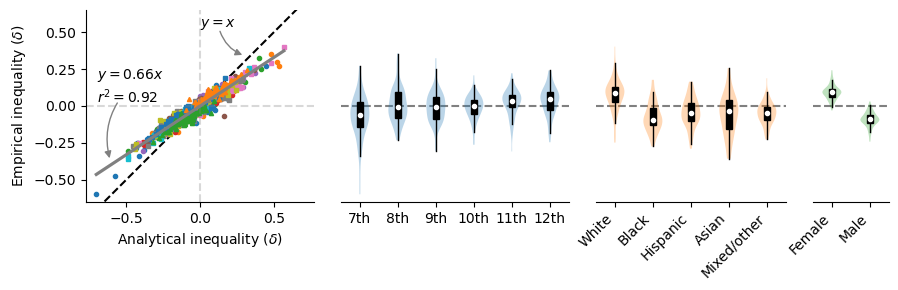

In [6]:
## Combined figure
plt.close("all")
ndim = len(dimensions_list)
g_vec = [len(all_attributes_dict[d]) for d in dimensions_list]
fig, axs = plt.subplots(1,ndim+1,figsize=(.75*5*ndim*.8,.75*4), gridspec_kw={'width_ratios': [g_vec[0]]+g_vec}, sharey=True)

#########################################################
symbols = ["o","s",r"^"]
## First axes
plt.sca(axs[0])

allx = []
ally = []
for di,d in enumerate(dimensions_list):
    for v in all_attributes_dict[d]:
        plt.plot(ineq_anal_lst[d][v],ineq_emp_lst[d][v],symbols[di], ms=3,label=v)
        ally.extend(ineq_emp_lst[d][v])
        allx.extend(ineq_anal_lst[d][v])
# plt.legend()
msk = np.logical_and(~np.isnan(allx),~np.isnan(ally))
allx = np.array(allx)[msk]
ally = np.array(ally)[msk]
plt.plot([-.7,.7],[-.7,.7],"--k",zorder=0)
lr = stats.linregress(allx,ally)
print (lr, lr.rvalue**2)

sns.regplot(pd.DataFrame({"x":allx,"y":ally}),x="x",y="y", scatter=False, ci=99, color="grey")
# plt.plot(allx, lr.intercept + allx*lr.slope,"-")

plt.ylim(-.65,.65)

plt.axvline(0,color="grey",ls="--",alpha=0.3)
plt.axhline(0,color="grey",ls="--",alpha=0.3)

plt.xlabel(r"Analytical inequality ($\delta$)")
plt.ylabel(r"Empirical inequality ($\delta$)")

## Annotate y=x line
axs[0].annotate("$y=x$",
                xy=(0.33, 0.33), xycoords='data',
                ha = "left",
                va = "bottom",
                xytext=(0.0, 0.5), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3",
                                ),
                )

## Annotate linear fit
formula_reg = f"$y = {lr.slope:.02f}x$\n$r^2={lr.rvalue**2:.02f}$"
axs[0].annotate(formula_reg,
                xy=(-0.6, -0.4), xycoords='data',
                ha = "left",
                va = "bottom",
                xytext=(-0.7, 0.0), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="0.5",
                                shrinkA=15, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3",
                                ),
                )

##################################################################
## Rest axes

for di, d in enumerate(dimensions_list):
    color = f"C{di}"
    
    xtcks = []
    plt.sca(axs[di+1])
    plt_cntr = 0
    for v in all_attributes_dict[d]:

        # plt.ylim(-0.6,0.6)
        vals = np.array(ineq_emp_lst[d][v])
        vals = vals[~np.isnan(vals)]
        p = plt.violinplot(vals,positions=[plt_cntr],showmeans=False, showmedians=False, showextrema=False, vert=True)
        p["bodies"][0].set_facecolor(color)
        plt.boxplot(vals,positions=[plt_cntr],
                    # notch=True,bootstrap=10000,
                    sym = "", ## do not plot outliers,
                    patch_artist=True,
                    boxprops=dict(facecolor='black'),
                    medianprops=dict(alpha=0),
                    capprops=dict(alpha=0)
                   )
        plt.plot(plt_cntr,np.median(vals),"ow",ms=3)
        plt_cntr += 1

        xtcks.append(v)

    rotation = 45 if any([len(i)>4 for i in xtcks]) else 0
    ha = "right" if rotation == 45 else "center"
    plt.xticks(range(len(xtcks)),xtcks,rotation=rotation,ha=ha)
    plt.axhline(0,color="grey",ls="--",zorder=0)

## Layout design

## Spines
axs[0].spines[['right', 'top']].set_visible(False)
for ax in axs[1:]:
    ax.spines[['left','right', 'top']].set_visible(False)
    ax.tick_params(axis='y', which='both', length=0)
    plt.setp(ax.get_yticklabels(), visible=False)    

plt.tight_layout()
plt.subplots_adjust( 
                    wspace=0.15)

# plt.savefig("temp/Fig5_top.png",dpi=600)
plt.show()

## Plot multidimensional inequalities

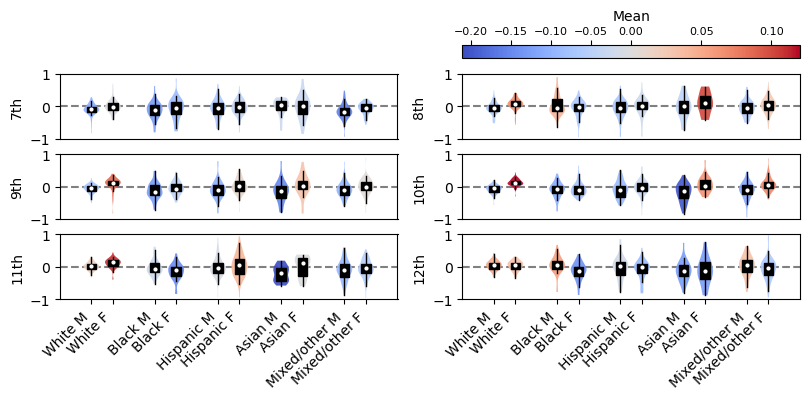

In [7]:
plt.close("all")
## Multidimensional empirical inequalities 1vRest
n_rows = len(all_attributes_dict["grade"])/2
fig, axs = plt.subplots(int(n_rows)+1,2,figsize=(.82*10,.82*5), gridspec_kw={'height_ratios': [0.2]+[1]*(int(n_rows))})
axs = axs.ravel()

pos_bias = {"Male":-0.17, "Female":0.17}
alpha_bias = {"Male":0.9, "Female":0.9}

median_vals = {group: np.nanmean(vals) for group,vals in ineq_emp_multi_lst.items()}
# norm = matplotlib.colors.Normalize(vmin=np.nanmin(list(median_vals.values())), vmax=np.nanmax(list(median_vals.values())))
# cmap = matplotlib.colormaps['plasma']
norm = matplotlib.colors.TwoSlopeNorm(0,vmin=np.nanmin(list(median_vals.values())), vmax=np.nanmax(list(median_vals.values())))
cmap = matplotlib.colormaps['coolwarm']

for gi, grade in enumerate(all_attributes_dict["grade"]):
    gi += 2
    xtcks = []
    plt.sca(axs[gi])
    plt.ylim(-1,1)
    for ri, race in enumerate(all_attributes_dict["race"]):
        ## Different color
        # color = f"C{ri}"
        for si, sex in enumerate(all_attributes_dict["sex"]):
            ## Darker or lighter color
            
            attr_tuple = (grade,race,sex)
            vals = ineq_emp_multi_lst[attr_tuple]
            vals = np.array(vals)
            vals = vals[~np.isnan(vals)]

            color = cmap(norm(np.mean(vals)))

            p = axs[gi].violinplot(vals,positions=[ri+pos_bias[sex]],showmeans=False, showmedians=False, showextrema=False, vert=True, widths=0.25)
            p["bodies"][0].set_facecolor(color)
            # p["bodies"][0].set_edgecolor("k")
            # p["bodies"][0].set_linewidth(0.5)
            p["bodies"][0].set_alpha(alpha_bias[sex])
            axs[gi].boxplot(vals,positions=[ri+pos_bias[sex]],
                        # notch=True,bootstrap=10000,
                        sym = "", ## do not plot outliers,
                        patch_artist=True,
                        boxprops=dict(facecolor='black'),
                        medianprops=dict(alpha=0),
                        capprops=dict(alpha=0)
                       )
            axs[gi].plot(ri+pos_bias[sex],np.median(vals),"ow",ms=2)

            xtcks.append(race + " " + sex[0])
    axs[gi].axhline(0,color="grey",ls="--",zorder=0)
    axs[gi].set_ylabel(grade)
    if gi >= 2*n_rows:
        xtcks_loc = axs[gi].get_xticks()
        axs[gi].set_xticks(xtcks_loc, xtcks,rotation=45,ha="right")
    else:
        axs[gi].set_xticks([], [])

## Add colorbar
axs[0].set_visible(False)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axs[1], orientation='horizontal',label="Mean")
# axs[1].xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1].xaxis.tick_top()
axs[1].xaxis.set_label_position('top')
axs[1].tick_params(axis='x', which='both', labelsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("temp/Fig5_bottom.png",dpi=600)
plt.show()